In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read and show data
results = pd.read_csv('../results/example_results.csv')
results.head()

,runtime(s),memory(kb)
0,1.4,12312
1,2.5,1231
2,5.5,12312


In [22]:
# add num vnfs column
results['VNFs'] = [i for i in range(results.shape[0])]
results.head()

,runtime(s),memory(kb),VNFs
0,1.4,12312,0
1,2.5,1231,1
2,5.5,12312,2


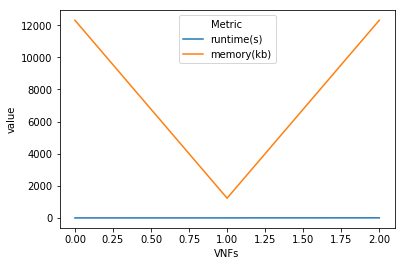

In [24]:
# transform into long format and plot
results_long = pd.melt(results, ['VNFs'], var_name='Metric')
sns.lineplot(x='VNFs', y='value', hue='Metric', data=results_long)

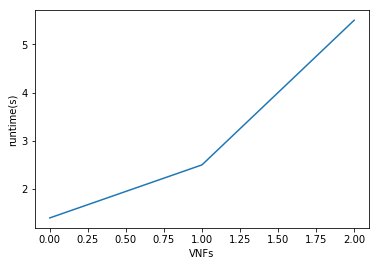

In [25]:
# plot runtime
sns.lineplot(x='VNFs', y='runtime(s)', data=results)

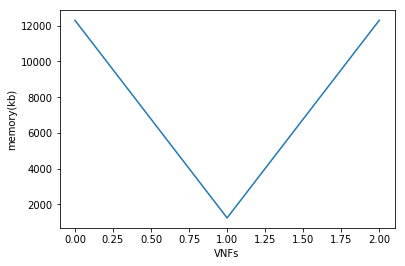

In [26]:
# plot runtime
sns.lineplot(x='VNFs', y='memory(kb)', data=results)